<a href="https://colab.research.google.com/github/t-kiran-05/TAYYIBA-KIRAN-DSMP-python/blob/main/Wholesale_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

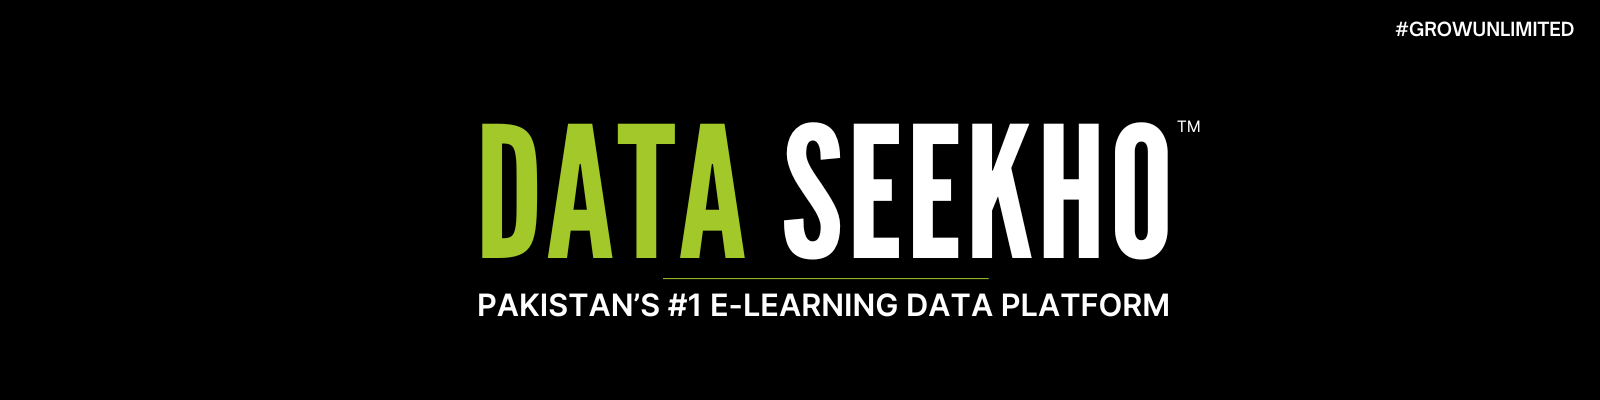

### 🚀 My Short Introduction! 🎓

- **Tayyiba Kiran** is an aspiring data professional at **Data Seekho**.
- 📚 Learning **Python, SQL, Machine Learning**, and more through **Data Seekho’s** courses.
- 💻 Engaging in **hands-on projects** and learning from **industry experts**.
- 🌟 Part of **Data Seekho’s supportive community**, aiming for top 1% in data.
- 🎯 Preparing for a **successful career** in Data Science with **Data Seekho**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('Wholesale-customers-data.csv')
print(df.head())




   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:
# Display basic info and check for missing values
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


# **Handling Missing Values**

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


# **Statistics**

In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000     

# **Detecting outliers**

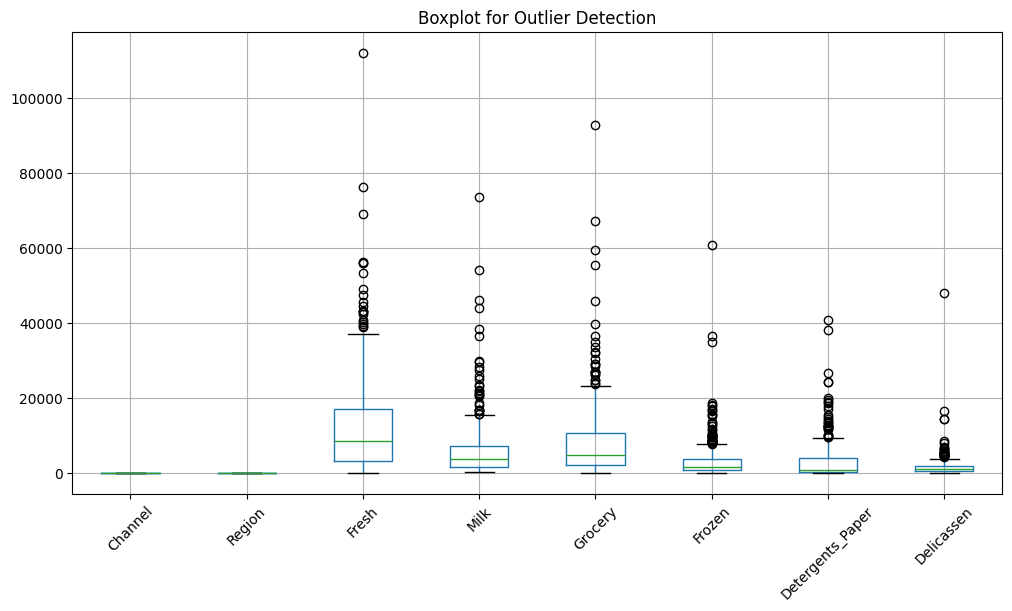

In [6]:
# Detecting outliers using boxplots
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

# **Elbow method**

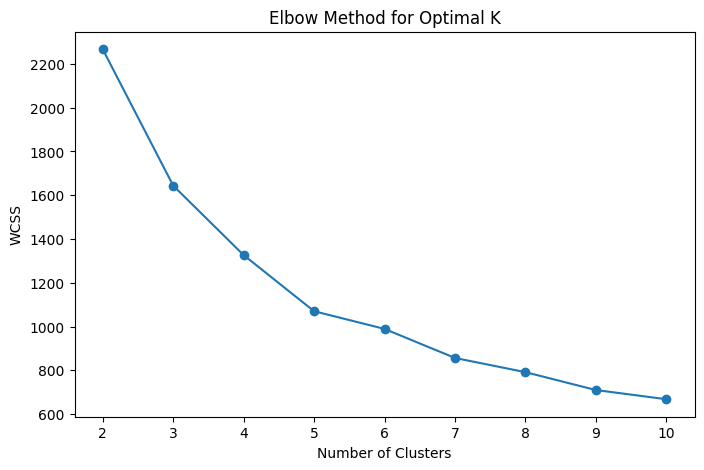

In [7]:
# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 2:])  # Assuming first two columns are not features

# Elbow method to find optimal K
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# **Silhouette score**

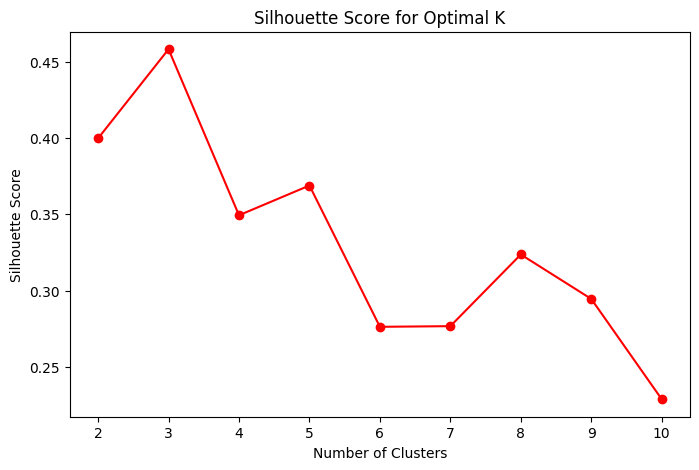

In [8]:
# Using silhouette score for better assessment
sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o', color='red')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

# **K-Means**

In [10]:
# Apply K-Means with optimal K (assume K=4 from analysis)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# **PCA**
to reduce dimentionality

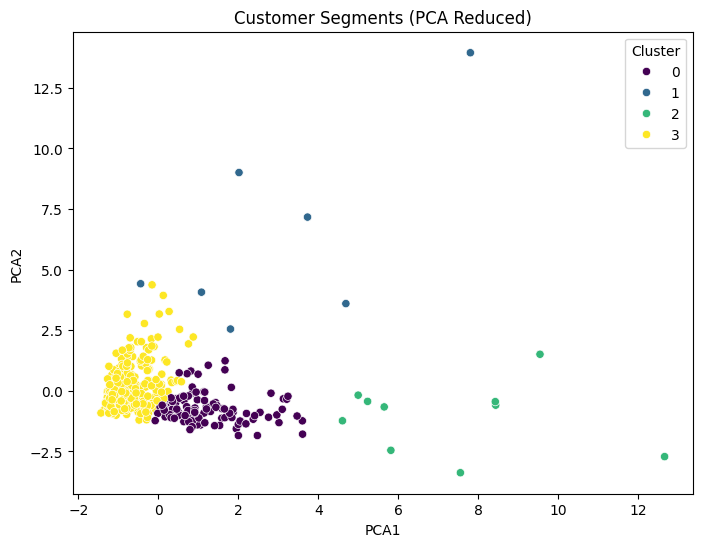


Cluster Characteristics:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.853211  2.550459   5474.926606  10194.192661  15587.807339   
1        1.142857  2.857143  40136.857143  19452.142857  15026.285714   
2        2.000000  2.500000  15964.900000  34708.500000  48536.900000   
3        1.121019  2.535032  13511.964968   3044.394904   3850.121019   

               Frozen  Detergents_Paper    Delicassen      PCA1      PCA2  
Cluster                                                                    
0         1464.385321       6734.642202   1642.458716  1.206360 -0.728707  
1        23713.714286       2374.142857  15735.142857  2.950997  6.393818  
2         3054.600000      24875.200000   2942.800000  7.286742 -1.059853  
3         3170.350318        854.808917   1122.105096 -0.716617  0.144175  


In [9]:

# PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Segments (PCA Reduced)")
plt.show()

# Display cluster characteristics
print("\nCluster Characteristics:")
print(df.groupby('Cluster').mean())